# Introduction


L’objectif du projet est de construire un code structuré et fonctionnel en python.
Ce code doit permettre de faire une prédiction sur le jeu de données Auto Insurance pour cible TARGET_FLAG.

Pour ce repondre à cette problematique, nous allons decomposer notre probleme:
 * Comprehension du probleme et du dataset
 * Nettoyage du dataset (datacleaning)
 * Feature Engineering
 * EDA (courte)
 * Application des modeles de ML
 * Imporation predictions dans un csv
 
Malheursement, nous n'avons pas d'inforamtions issues du Kaggle concernant les features du dataset.

##### Dans un premier temps nous allons importer les differentes librairies et fonctions utiles à notre projet

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

# machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#### Acquisition de la data

La librairies Pandas va enormement nous aider dans le travail de données. Nous allons tout d'abord recuperer les differents jeu de données nottament de train et de test dans des DataFrames Pandas. 

In [2]:
train_df = pd.read_csv('train_auto.csv')
test_df = pd.read_csv('test_auto.csv')

Suppresion de Target_AMT car ce n'est pas celle que l'on veut predire et comporte que NAN ds le jeu de test

In [3]:
train_df=train_df.drop(['TARGET_AMT'], axis=1)
test_df=test_df.drop(['TARGET_AMT'], axis=1)

### Analyse de notre jeu de données
Nous allons donc dans un premier temps analyser notre jeu de données à travers:
* Taille du dataset ?
* Les types de differentes features
  * Variables categorielles
  * Variables numeriques
* Faut-il changer les noms de colonnes pour que cela soit plus explicite ?
* Suppresion des symboles qui genent a la comprenhension ($,#...)

Cette premiere partie fait partie du Data cleaning. Nous allons donc nettoyer notre dataset afin de pouvoir l'analyser (dans un premier temps) dans les meilleurs conditions

In [4]:
#Check rapide de notre dataset
train_df.head()

,INDEX,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0,60.0,0,11.0,"$67,349",No,$0,z_No,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [5]:
#Quels est la taille de notre dataset
train_df.shape

(8161, 25)

In [6]:
#Quels sont les features ?
train_df.columns

Index(['INDEX', 'TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [7]:
#Analysons les types de nos features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 25 columns):
INDEX          8161 non-null int64
TARGET_FLAG    8161 non-null int64
KIDSDRIV       8161 non-null int64
AGE            8155 non-null float64
HOMEKIDS       8161 non-null int64
YOJ            7707 non-null float64
INCOME         7716 non-null object
PARENT1        8161 non-null object
HOME_VAL       7697 non-null object
MSTATUS        8161 non-null object
SEX            8161 non-null object
EDUCATION      8161 non-null object
JOB            7635 non-null object
TRAVTIME       8161 non-null int64
CAR_USE        8161 non-null object
BLUEBOOK       8161 non-null object
TIF            8161 non-null int64
CAR_TYPE       8161 non-null object
RED_CAR        8161 non-null object
OLDCLAIM       8161 non-null object
CLM_FREQ       8161 non-null int64
REVOKED        8161 non-null object
MVR_PTS        8161 non-null int64
CAR_AGE        7651 non-null float64
URBANICITY     8161 non-null objec

Nous comprenons alors que :
* Notre dataset est composer de 26 colonnes et de 8161 lignes
* Il y a 12 variables numériques et 14 variables categorielles

In [8]:
#Nous regadons ici les differentes informations sur les variables numeriques
train_df.describe()

,INDEX,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.263816,0.171057,44.790313,0.721235,10.499286,33.485725,5.351305,0.798554,1.695503,8.328323
std,2978.893962,0.440728,0.511534,8.627589,1.116323,4.092474,15.908333,4.146635,1.158453,2.147112,5.700742
min,1.000000,0.000000,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000
25%,2559.000000,0.000000,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000


Ce que l'on comprend ici (entre autres):

* TARGET_FLAG a deux valeurs possible 0 ou 1. C'est donc bien une variable categorielle que nous allons predire (probleme de classification)
* L'age est compris entre 44 et 81 ans
* Les variables ne sont pas totutes à la meme echelle.

In [9]:
#Nous regadons ici les differentes informations sur les variables categorielles
train_df.describe(include=['O'])

,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,URBANICITY
count,7716,8161,7697,8161,8161,8161,7635,8161,8161,8161,8161,8161,8161,8161
unique,6612,2,5106,2,2,5,8,2,2789,6,2,2857,2,2
top,$0,No,$0,Yes,z_F,z_High School,z_Blue Collar,Private,"$1,500",z_SUV,no,$0,No,Highly Urban/ Urban
freq,615,7084,2294,4894,4375,2330,1825,5132,157,2294,5783,5009,7161,6492


Ce que l'on comprend ici:
* Aucune varibale n'a de valeurs unique.
* De nombreuses variables prenent 2 valeurs possibles ce qui semble logique comme le sex avec plus de femme que d'homme avec 53%
* Il y a 8 differents type de Job et 6 differents type de voiture avec SUV qui est le plus present avec 28%

In [10]:
train_df.columns = train_df.columns.str.replace(' ', '')
test_df.columns = test_df.columns.str.replace(' ', '')

Nous allons enlever à present les symboles qui genent à la comprehension

In [11]:
train_df['INCOME']=train_df['INCOME'].str.replace('$', '')
train_df['INCOME']=train_df['INCOME'].str.replace(',', '.')

train_df['OLDCLAIM']=train_df['OLDCLAIM'].str.replace('$', '')
train_df['OLDCLAIM']=train_df['OLDCLAIM'].str.replace(',', '.')

train_df['HOME_VAL']=train_df['HOME_VAL'].str.replace('$', '')
train_df['HOME_VAL']=train_df['HOME_VAL'].str.replace(',', '.')

train_df['BLUEBOOK']=train_df['BLUEBOOK'].str.replace('$', '')
train_df['BLUEBOOK']=train_df['BLUEBOOK'].str.replace(',', '.')

train_df['INCOME']=train_df['INCOME'].str.replace('$', '')
train_df['INCOME']=train_df['INCOME'].str.replace(',', '.')


In [12]:
test_df['INCOME']=test_df['INCOME'].str.replace('$', '')
test_df['INCOME']=test_df['INCOME'].str.replace(',', '.')

test_df['OLDCLAIM']=test_df['OLDCLAIM'].str.replace('$', '')
test_df['OLDCLAIM']=test_df['OLDCLAIM'].str.replace(',', '.')

test_df['HOME_VAL']=test_df['HOME_VAL'].str.replace('$', '')
test_df['HOME_VAL']=test_df['HOME_VAL'].str.replace(',', '.')

test_df['BLUEBOOK']=test_df['BLUEBOOK'].str.replace('$', '')
test_df['BLUEBOOK']=test_df['BLUEBOOK'].str.replace(',', '.')

test_df['INCOME']=test_df['INCOME'].str.replace('$', '')
test_df['INCOME']=test_df['INCOME'].str.replace(',', '.')

Convertissions à present les type objet en float une fois les symboles retirés

### Feature Engineering

Nous allons donc dans un transformer notre jeu de données à travers:
* Nombre de valeurs sans informations (Nan) ?
* Convertir certain type
* Concatenation de colonne
* Supression de colonne inutile au model (nunique,>80% Nan ...)
* Scaler certaines features (log)

Cette premiere partie fait partie du Data cleaning. Nous allons donc nettoyer notre dataset afin de pouvoir l'analyser (dans un premier temps) dans les meilleurs conditions

In [13]:
train_df['HOME_VAL']=train_df['HOME_VAL'].astype(str).astype(float)
train_df['BLUEBOOK']=train_df['BLUEBOOK'].astype(str).astype(float)
train_df['OLDCLAIM']=train_df['OLDCLAIM'].astype(str).astype(float)
train_df['INCOME']=train_df['INCOME'].astype(object).astype(float)

In [14]:
test_df['HOME_VAL']=test_df['HOME_VAL'].astype(str).astype(float)
test_df['BLUEBOOK']=test_df['BLUEBOOK'].astype(str).astype(float)
test_df['OLDCLAIM']=test_df['OLDCLAIM'].astype(str).astype(float)
test_df['INCOME']=test_df['INCOME'].astype(object).astype(float)

Regardons les valeurs maquantes de notre dataset à travers quelques visualisations

In [15]:
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['TARGET_FLAG'], axis=1, inplace=True) #data to be predicted
print("all_data size is : {}".format(all_data.shape))
y_train = train_df.TARGET_FLAG.values

all_data size is : (10302, 24)


In [16]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

Text(0.5, 1.0, 'Percent missing data by feature')

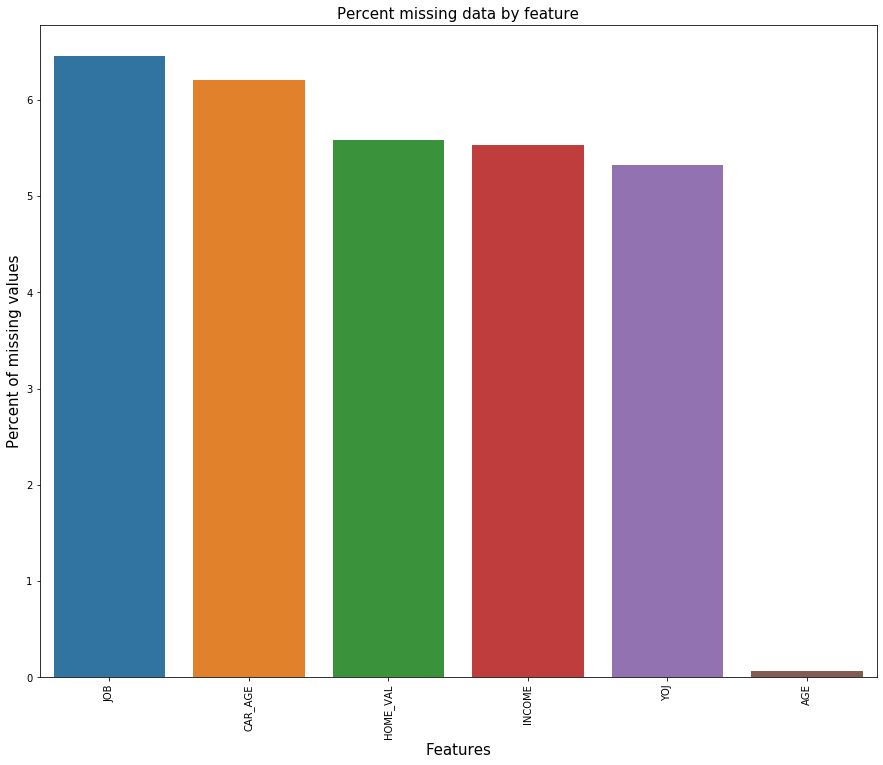

In [17]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Nous comprenons alors que:
* Que six features possedent des valeurs manquantes: YOJ, INCOME, HOME_VAL,JOB and CAR_AGE et AGE

Nous allons donc nous occuper des ses valeurs manquantes.*

*En temps normal il est necessaires de faire au cas par cas.

In [18]:
#Pour CAR_AGE, INCOME nous allons mettre la moyenne des colonnes à la place
train_df["CAR_AGE"] = train_df["CAR_AGE"].fillna(train_df["CAR_AGE"].mean())
train_df["INCOME"] = train_df["INCOME"].fillna(train_df["INCOME"].mean())
train_df["AGE"] = train_df["AGE"].fillna(train_df["AGE"].mean())
train_df["HOME_VAL"] = train_df["HOME_VAL"].fillna(train_df["HOME_VAL"].mean())
train_df["YOJ"] = train_df["YOJ"].fillna(train_df["YOJ"].mean())

#Pour CAR_AGE, INCOME nous allons mettre le mode de la colonnes à la place
train_df['JOB'] = train_df['JOB'].fillna(train_df['JOB'].mode()[0])

In [19]:
test_df["CAR_AGE"] = test_df["CAR_AGE"].fillna(test_df["CAR_AGE"].mean())
test_df["INCOME"] = test_df["INCOME"].fillna(test_df["INCOME"].mean())
test_df["AGE"] = test_df["AGE"].fillna(test_df["AGE"].mean())
test_df["HOME_VAL"] = test_df["HOME_VAL"].fillna(test_df["HOME_VAL"].mean())
test_df["YOJ"] = test_df["YOJ"].fillna(test_df["YOJ"].mean())

test_df['JOB'] = all_data['JOB'].fillna(test_df['JOB'].mode()[0])

#### Analyse courte de notre target

Nous allons à present travailler sur la variable à predire, c'est a dire TARGET_Flag. Nous avons ici un probleme de Classification.

In [20]:
#Remplacement des Nan par des 0 afin de faire fonctionner nos modeles
test_df["TARGET_FLAG"] = test_df["TARGET_FLAG"].fillna('0')

In [21]:
# Statistique de notre target
train_df['TARGET_FLAG'].describe()

count    8161.000000
mean        0.263816
std         0.440728
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: TARGET_FLAG, dtype: float64

Interessant...Nous avons bien comme nous l'avons pensez des varibles binaire 0 ou 1. Regardons ca de plus pret travers un histogramme. Nous utilisons ici la library Seaborn qui propose des visualisation parfois trés pertinentes.

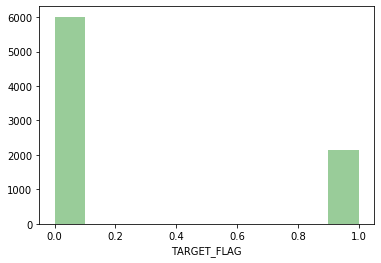

In [22]:
#Histogramme afin de voir sa distribution
sns.distplot(train_df['TARGET_FLAG'],bins=10, kde=False,color='g')

La valeur 0 revient donc bien plus que la valeur 1

## EDA 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFD6547390>,
      dtype=object)

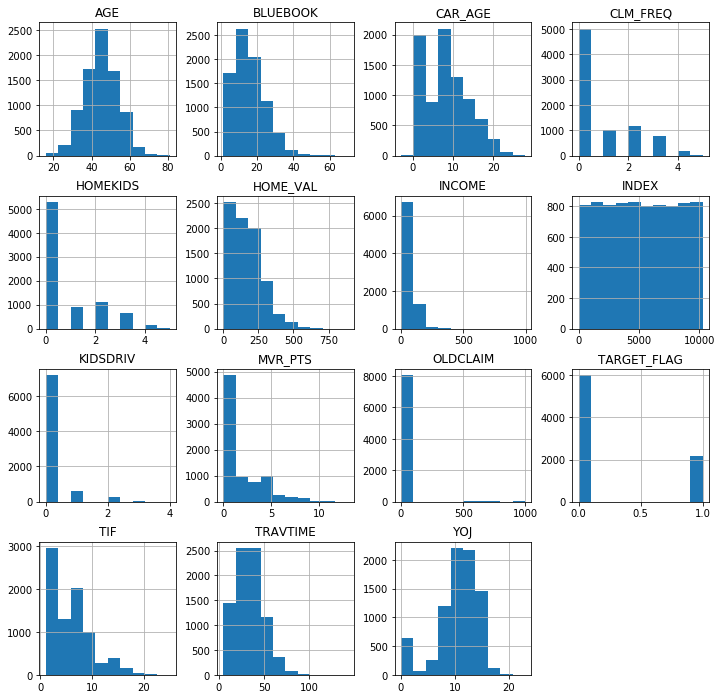

In [23]:
#Plot histograms of CUT1 variables
train_df.hist(bins=10, figsize=(12, 12))

On remarque garce à ces differentes distributions que :

* De nombreuses d'entres elles ont des skewness positives comme par exemple HOME_VAL ou MVR_PTS.
* La variable OLDCLAIM à une distribution un peu surpreneante la valeur 0 en dominante.
* Les echelles de données sont differentes


Nous allons à present mettre à la meme echelle certaines features qui ont des valeurs qui ont des valeures bien plus grandes que notre target comme par exemple (AGE et TRAVETIME) en passsant par le logarithme.

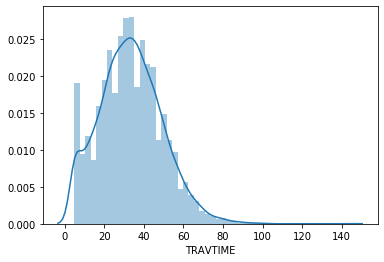

In [24]:
#Histogramme afin de voir la distribution de TRAVETIME par exemple
sns.distplot(train_df['TRAVTIME']);

In [25]:
#Log transform data
log_columns = ['AGE','TRAVTIME','BLUEBOOK','TIF']
df_cut1_log_trans=train_df.loc[:,log_columns]
train_df[log_columns] = df_cut1_log_trans[log_columns].apply(np.log10)

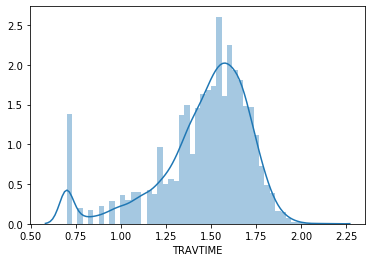

In [26]:
#Histogramme afin de voir sa distribution maintenant
sns.distplot(train_df['TRAVTIME']);

#### Correlation (Pearson) sur les features continues

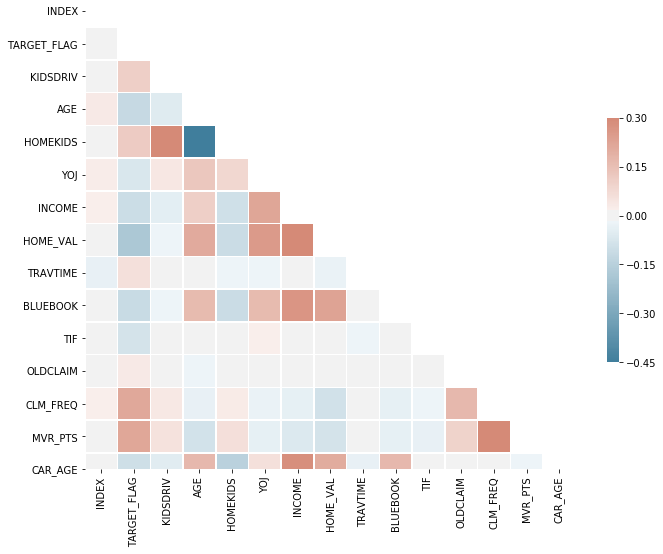

In [27]:
# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

On remarque des fortes correlations entre les variables :
* TARGET_FLAG et CLM_FREQ / MVR_PTS
* HOMEKIDS et KIDSDRIVE

On remarque des correlations opposées entre les variables :
* AGE et HOMEKIDS
* HOMEVAL et TARGET_FLAG

## Label encoder

Nous permet de transformer des variables categorielles en variables continues

In [28]:
cols = ('PARENT1','CAR_USE','MSTATUS','SEX','EDUCATION','JOB','CAR_TYPE','RED_CAR','REVOKED','URBANICITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_df[c].values)) 
    train_df[c] = lbl.transform(list(train_df[c].values))

# shape        
print('Shape all_data: {}'.format(train_df.shape))

Shape all_data: (8161, 25)


In [29]:
cols = ('PARENT1','CAR_USE','MSTATUS','SEX','EDUCATION','JOB','CAR_TYPE','RED_CAR','REVOKED','URBANICITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test_df[c].values)) 
    test_df[c] = lbl.transform(list(test_df[c].values))

# shape        
print('Shape all_data: {}'.format(test_df.shape))

Shape all_data: (2141, 25)


In [30]:
train_df.dtypes

INDEX            int64
TARGET_FLAG      int64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME         float64
PARENT1          int64
HOME_VAL       float64
MSTATUS          int64
SEX              int64
EDUCATION        int64
JOB              int64
TRAVTIME       float64
CAR_USE          int64
BLUEBOOK       float64
TIF            float64
CAR_TYPE         int64
RED_CAR          int64
OLDCLAIM       float64
CLM_FREQ         int64
REVOKED          int64
MVR_PTS          int64
CAR_AGE        float64
URBANICITY       int64
dtype: object

## Modeles de machine learning

Nous allons à present appliquer nos modeles de ML sur nos données. Le probleme etant une classification, nous allons passer par les modeles suivants car ils sont reconnues pour leurs efficacités:

* Logistic Regression
* Support Vector Machines
* Perceptron
* KNN

In [31]:
X_train = train_df.drop("TARGET_FLAG", axis=1)
Y_train = train_df["TARGET_FLAG"]
X_test  = test_df.drop("INDEX", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((8161, 24), (8161,), (2141, 24))

In [32]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\Simon\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


74.66

In [33]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

73.62

In [34]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

73.57

In [35]:
#KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.58

#### Nous allons donc garder notre model de KNN car c'est le plus performant des quatres.



Feature: 0, Score: 0.15319
Feature: 1, Score: -0.00002
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00017
Feature: 4, Score: 0.00257
Feature: 5, Score: 0.07935
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.12719
Feature: 8, Score: 0.00005
Feature: 9, Score: 0.00005
Feature: 10, Score: 0.00066
Feature: 11, Score: 0.00196
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00005
Feature: 16, Score: 0.00047
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.01247
Feature: 19, Score: 0.00010
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00093
Feature: 22, Score: 0.00208
Feature: 23, Score: -0.00010


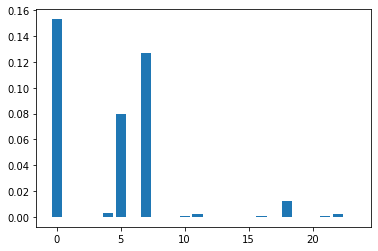

In [36]:
from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(knn, X_train, Y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [37]:
#Conservation des features qui ont un impact sur notre modele
train_df = train_df.drop(['KIDSDRIV', 'MSTATUS', 'SEX', 'TRAVTIME', 'BLUEBOOK', 'TIF','OLDCLAIM'],1)
test_df = test_df.drop(['KIDSDRIV', 'MSTATUS', 'SEX', 'TRAVTIME', 'BLUEBOOK', 'TIF','OLDCLAIM'],1)

#Reinitilisation des jeu de train et test
X_train = train_df.drop("TARGET_FLAG", axis=1)
Y_train = train_df["TARGET_FLAG"]
X_test  = test_df.drop("INDEX", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((8161, 17), (8161,), (2141, 17))

In [38]:
#KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("Score: ",acc_knn)

Score:  82.67


### Nous avons amelioré le score de notre modele grace à la selection de features qui ont plus d'importance dans ce modele.

 Nous allons maintenant predire notre target TARGET_FLAG grace au modele de KNN. Desormais les predictions seront affichées dans le csv submission pour chaque INDEX client.


In [39]:
prediction= knn.predict(X_test)
prediction.size

2141

In [40]:
INDEX = test_df['INDEX']
output = pd.DataFrame({'INDEX': INDEX, 'TARGET_FLAG': prediction},columns=['INDEX','TARGET_FLAG'])
output.to_csv('my_submission.csv', index=False)

In [41]:
output.head()

,INDEX,TARGET_FLAG
0,3,1
1,9,0
2,10,0
3,18,0
4,21,1


### Conclusion

Ce projet était court mais enrichissant. Bien sur j'aurais aimé effectuer plus de netoyage sur mes données, effectuer une ACP pour reduire le nombre de dimensions de mes variables, regarder les p_value ou analyser variables par variables afin d'effectuer le traitement le plus efficace des Nan. J'aurais egalement pu diminuer les nombres de categories par features ou encore creer de nouvelles features afin de rendre ce modele encore plus précis.

Mon EDA est assez rapide mais permet de comprendre les features dans leurs globalités à travers leurs distribution et leurs correlations.

Enfin pour ce qui est des modeles, il aurait fallu parametrer notre modele de KNN afin de l'optimiser à travers la selection des features les plus efficaces, mettre les features negatives à 0 et pourquoi pas effetuer un grid_search afin d'optismer les hyperparametres des autre modeles.

Je vous remercie pour votre lecture. Si vous avez la moindre remarques, n'hesitez pas a me contacter : simon.adda@yahoo.fr

Simon ADDA